In [1]:
from pandas import read_csv, DataFrame
from sklearn.cluster import KMeans
# from collections import defaultdict
import os
import sys
sys.path.insert(0, 'C:/Users/jjung/Documents/GitHub//bkmark_organizer/test_parser_stemmer/prototype/TxtClus/')
from nlp.termWeighting import doc_term_matrix
from EstimateK.seqFit import sensitiv

In [2]:
# def text_groupings(param_dict):
#     news_df = read_csv(param_dict['file_loc'], encoding = 'latin1')
#     X = doc_term_matrix(news_df.TITLE, param_dict).toarray()
#     sensitiv(X)
    
class Clusterings(object):
    '''Define class for .'''
    def __init__(self, param_dict):
        self.__param_dict = param_dict        
    
    def get_file(self):
        '''read csv input into a pandas data frame'''
        return read_csv(self.__param_dict['file_loc'], encoding = 'latin1')

    def term_weight_matr(self, snippetsArr):
        '''compute a document-term matrix based on a collection of text documents'''
        return doc_term_matrix(snippetsArr, self.__param_dict)
    
#     def sensitivity2k(self): 
#         sensitiv(X)


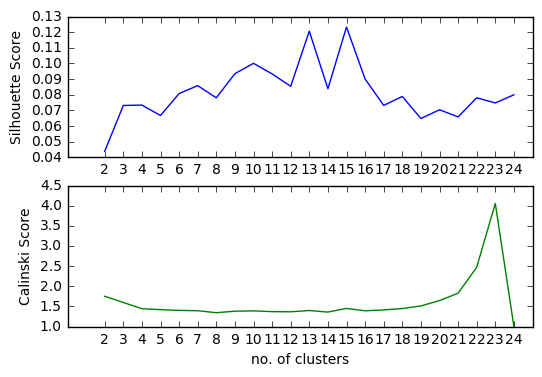

In [4]:
if __name__ == "__main__":
    news_file = sys.path[0] + 'Input/newsSample.csv'    
    # Run 1:
    vecSpaceModel1 = Clusterings({'run': 1,
                                'file_loc': news_file,
                                'samp_size': 25,
                                'tf_dampen': True,
                                'common_word_pct': 1,
                                'rare_word_pct': 1,
                                'dim_redu': False})
    term_weight_obj = vecSpaceModel1.term_weight_matr(vecSpaceModel1.get_file().TITLE)
    X1 = term_weight_obj['docTerm_X'].toarray()
    sensitiv(X1)    

In [9]:
    df = DataFrame({'predictedCluster': KMeans(17).fit(X1).labels_, 
                    'document': term_weight_obj['samp']}).sort_values(by='predictedCluster')
    
    print(df)

                                             document  predictedCluster
4   BNP Paribas leads European shares higher after...                 0
9                 Gas prices creep higher in Billings                 0
22  Movie review: Visuals not enough to heat up 'P...                 1
5   Amazon Breathes 'Fire' Into Smartphone Space W...                 1
13  Amazon Breathes 'Fire' Into Smartphone Space W...                 1
1   Yen Rises to Highest in Week on Ukraine Haven ...                 2
18            Teens are smoking less but texting more                 3
17  Smoking bans reduce childhood asthma and prema...                 3
7             AOL add Miramax films to video platform                 4
23  Google to buy video-streaming service Twitch: ...                 4
16  Neil Young's PonoMusic music service will debu...                 5
20  2 Warning Signs That Twitter Could Fall on Ear...                 5
10  Daily Wrap: Rough day for wrestling and Red Lo...           